# Sampling of the regression parameters

## Libraries and Packages

In [1]:
import numpy as np
import pandas as pd
import holmc as hc
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

## Data and Pre-processing

In [2]:
air_quality = fetch_ucirepo(id=360)
# X_raw contains the entire dataset including the target variable
X_raw = air_quality.data.features
# Convert X_raw to PandasDataFrame
X_df = pd.DataFrame(X_raw)
# Extract y and convert it to numpy arrays
y = X_df['CO(GT)'].replace(-200, np.nan).astype(float)
mask = ~y.isna()
y = y[mask].values
# Drop the target from the X_df
X_df = X_df.loc[mask].copy()
X_df.drop(columns=['CO(GT)'], inplace=True)

Primarily, this is how it looks like

In [3]:
X_df

,Date,Time,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [4]:
# Further pre-processing of the features
# Create a new feature called 'datetime'
X_df['datetime']=pd.to_datetime(
    X_df['Date']+" "+X_df['Time'], dayfirst=True,
    format='mixed'
)
# Drop the original 'Date' and 'Time' feature as they
# are already included in the 'datetime' feature
X_df.drop(columns=['Date','Time'], inplace=True)
# Create 4 new features from the 'datetime' feature
X_df['day'] = X_df['datetime'].dt.day
X_df['hour'] = X_df['datetime'].dt.hour
X_df['month'] = X_df['datetime'].dt.month
X_df['year'] = X_df['datetime'].dt.year
# Drop the original 'datetime' feature
X_df.drop(columns=['datetime'], inplace=True)
# Replace -200 for the placeholder in the 
# missing data, and filled with Numpy nan values
X_df.replace(-200, np.nan, inplace=True)
# Use the sklearn imputer to impute the missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X_df)
# Standardize the final data set
scaler = StandardScaler()
X = scaler.fit_transform(X_imputed)

## Sampling the regression parameters  
### Priors and known posteriors

In [5]:
metric = hc.Wasserstein2Distance(X=X,y=y)
prior_mean, prior_cov = metric.priors()
posterior_mean, posterior_cov = metric.posteriors()
print("Prior Mean: {}     Poseterior Mean: {}".format(
    prior_mean, posterior_mean))

print("Prior Covariance: \n{}".format(
    prior_cov))

print("Posterior Covariance: \n{}".format(
    posterior_cov))

Prior Mean: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]     Poseterior Mean: [ 0.286388    0.07183008  0.80755753 -0.37270877  0.50691442 -0.03602451
  0.12320721  0.38556753 -0.15464654 -0.20894354 -0.10496172 -0.07301214
 -0.00271707  0.10569938  0.02607148 -0.09253256]
Prior Covariance: 
[[10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0

In [6]:
seed = 101
np.random.seed(seed)
N = 1000 # Number of samples to draw from the posterior
lamb = 2 # Regularization parameter
eta = 0.005 # Step size for Langevin dynamics
gamma = 20 
xi = 20
o3p = hc.O3Params(eta=eta, gamma=gamma, xi=xi)
sampler3 = hc.HoLMCSamplerO3Regression(
    params=o3p, N=N, seed=seed, show_progress=True
)
gamma = 20
o4p = hc.O4Params(eta=eta, gamma=gamma)
sampler4 = hc.HoLMCSamplerO4Regression(
    params=o4p,
    N=N,
    seed=seed,
    show_progress=True
)
sample3 = sampler3.sample(X=X, y=y, lamb=lamb)
sample4 = sampler4.sample(X=X, y=y, lamb=lamb)

100%|██████████| 1000/1000 [00:00<00:00, 4935.39it/s]


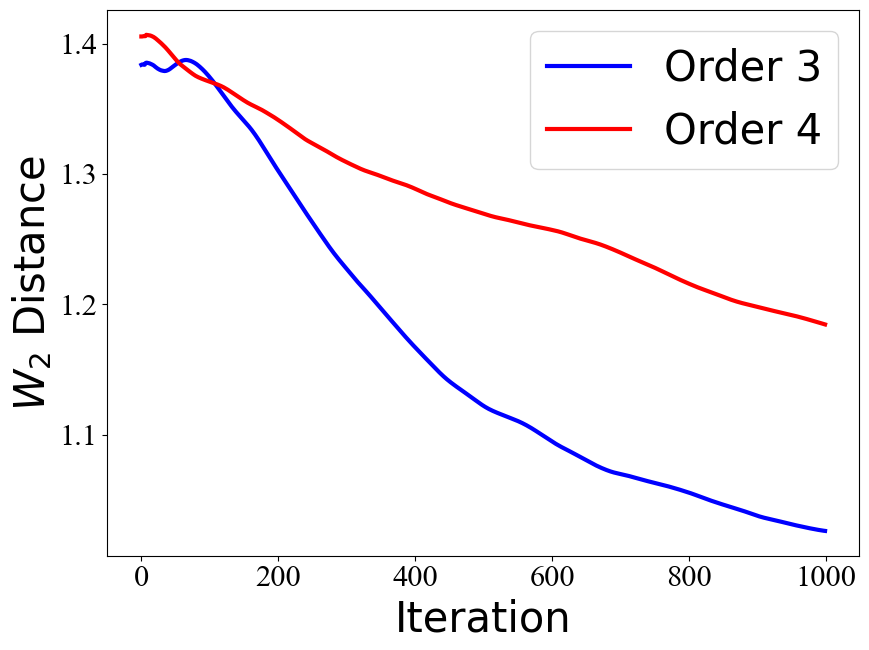

In [7]:
w2_distances = {}
w2_distances['Order 3'] = metric.w2distance(sample3, log_scale=True)
w2_distances['Order 4'] = metric.w2distance(sample4, log_scale=True)
# Plotting
figure, ax = plt.subplots(figsize=(8.8, 6.6))
plt.plot(w2_distances['Order 3'], label='Order 3', color='blue', linewidth=3)
plt.plot(w2_distances['Order 4'], label='Order 4', color='red', linewidth=3)
plt.xlabel("Iteration", fontsize=30)
plt.ylabel("$W_2$ Distance", fontsize=30)
plt.legend(fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=22) 
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Times New Roman')
plt.tight_layout()
plt.show()

## Hyper-param tuning

In [8]:
etas = [0.0001, 0.0004, 0.0008, 0.003, 0.006, 0.009, 0.011]
gammas = [1, 5, 10, 20, 40, 80]
xis = [2, 10, 20, 40, 80, 160]

### Order 3 sampling with tuned hyper-params

100%|██████████| 1000/1000 [00:00<00:00, 33585.06it/s]


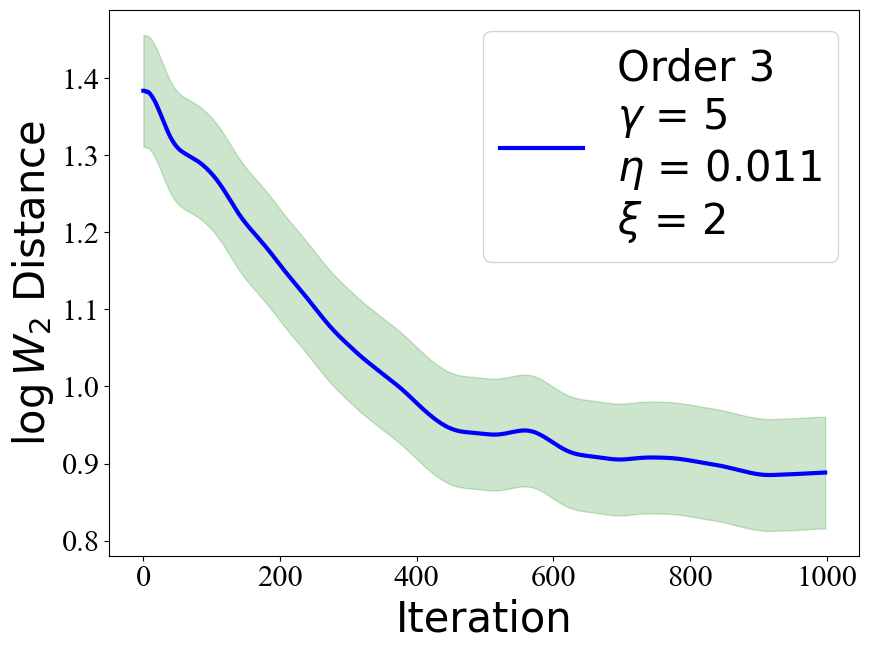

In [9]:
o3_search = hc.GridSearchRegression(
    gammas=gammas, etas=etas, xis=xis, N=N ,seed=seed, show_progress=True
)
o3paramspace = o3_search.run(X=X, y=y, lamb=lamb)
o3best_gamma = o3paramspace.iloc[0,0]
o3best_eta = o3paramspace.iloc[0,1]
o3best_xi = o3paramspace.iloc[0,3]
o3p = hc.O3Params(eta=o3best_eta, gamma=o3best_gamma, xi=o3best_xi)
sampler3 = hc.HoLMCSamplerO3Regression(
    params=o3p, N=N, seed=seed, show_progress=True
)
sample3 = sampler3.sample(X=X, y=y, lamb=lamb)
w2_distances = {}
w2_distances['Order 3'] = metric.w2distance(sample3, log_scale=True)
StDev = {}
StDev['Order 3'] = np.std(w2_distances['Order 3'], axis=0)
# Plotting
figure, ax = plt.subplots(figsize=(8.8, 6.6))
index = list(range(N-1))
label_str = (
    "Order 3\n"
    f"$\\gamma$ = {o3best_gamma}\n"
    f"$\\eta$ = {o3best_eta}\n"
    f"$\\xi$ = {o3best_xi}"
)
plt.plot(w2_distances['Order 3'], label=label_str, color='blue', linewidth=3)
plt.fill_between(index, 
                 w2_distances['Order 3'] - 0.5 * StDev['Order 3'], 
                 w2_distances['Order 3'] +0.5 * StDev['Order 3'], 
                 color='green', alpha=0.2)
plt.xlabel("Iteration", fontsize=30)
plt.ylabel("$\\log{W_2}$ Distance", fontsize=30)
plt.legend(fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=22) 
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Times New Roman')
plt.tight_layout()
plt.savefig('../images/o3reg.png')
plt.show()

### Order 4 sampling with tuned hyper-params

100%|██████████| 1000/1000 [00:00<00:00, 5106.32it/s]


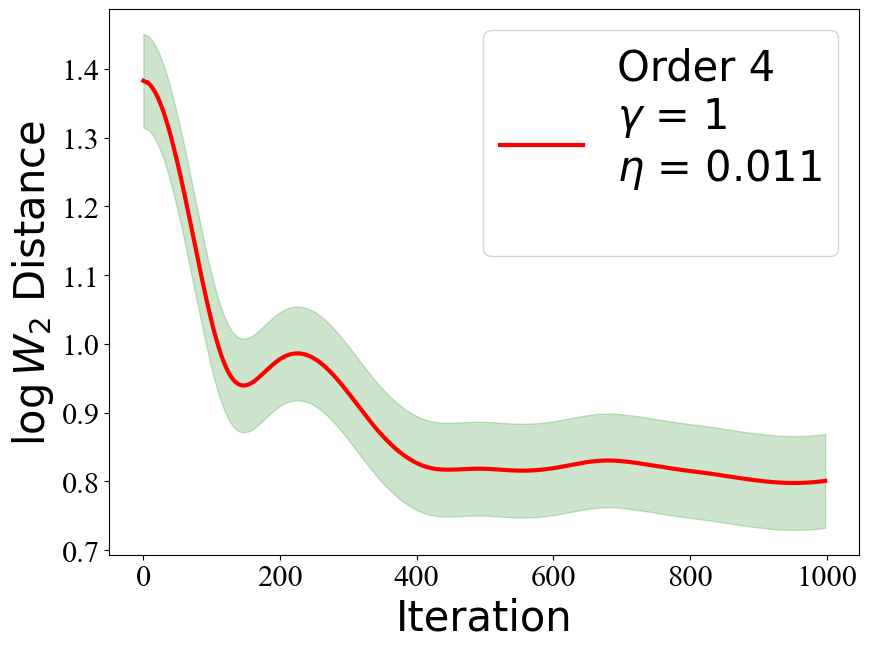

In [10]:
o4_search = hc.GridSearchRegression(
    gammas=gammas, etas=etas, N=N, seed=seed, show_progress=True
)
o4paramspace = o4_search.run(X=X, y=y, lamb=lamb)
o4best_gamma = o4paramspace.iloc[0,0]
o4best_eta = o4paramspace.iloc[0,1]
o4p = hc.O4Params(eta=o4best_eta, gamma=o4best_gamma)
sampler4 = hc.HoLMCSamplerO4Regression(
    params=o4p,
    N=N,
    seed=seed,
    show_progress=True
)
sample4 = sampler4.sample(X=X, y=y, lamb=lamb)
w2_distances['Order 4'] = metric.w2distance(sample4, log_scale=True)
StDev = {}
StDev['Order 4'] = np.std(w2_distances['Order 4'], axis=0)
# Plotting
figure, ax = plt.subplots(figsize=(8.8, 6.6))
label_str = (
    "Order 4\n"
    f"$\\gamma$ = {o4best_gamma}\n"
    f"$\\eta$ = {o4best_eta}\n"
)
plt.plot(w2_distances['Order 4'], label=label_str, color='red', linewidth=3)
plt.fill_between(index, 
                 w2_distances['Order 4'] - 0.5 * StDev['Order 4'], 
                 w2_distances['Order 4'] + 0.5 * StDev['Order 4'], 
                 color='green', alpha=0.2)
plt.xlabel("Iteration", fontsize=30)
plt.ylabel("$\\log{W_2}$ Distance", fontsize=30)
plt.legend(fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=22) 
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Times New Roman')
plt.tight_layout()
plt.savefig('../images/o4reg.png')
plt.show()

### Comparative performances

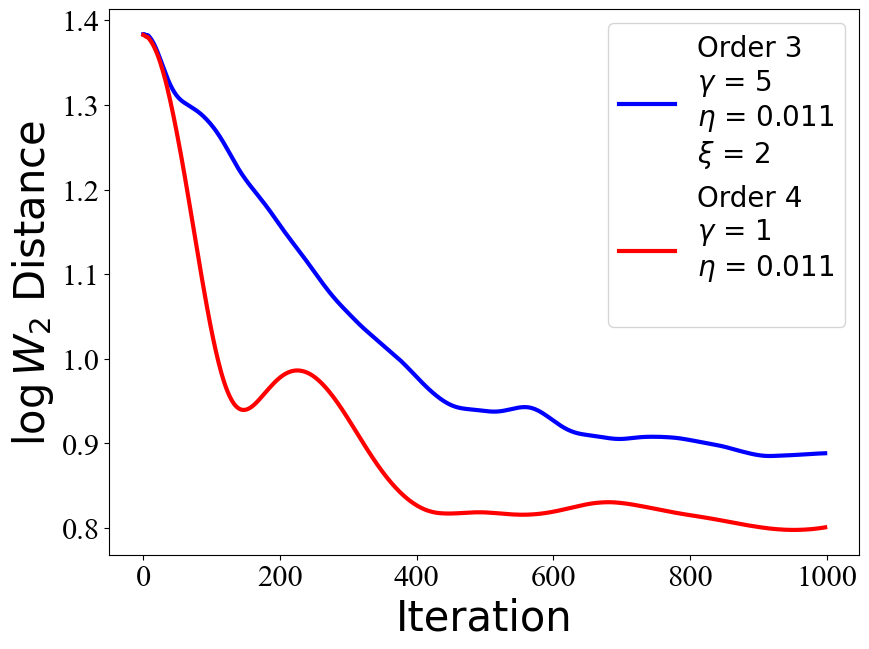

In [11]:
# Plotting
label_str3 = (
    "Order 3\n"
    f"$\\gamma$ = {o3best_gamma}\n"
    f"$\\eta$ = {o3best_eta}\n"
    f"$\\xi$ = {o3best_xi}"
)
label_str4 = (
    "Order 4\n"
    f"$\\gamma$ = {o4best_gamma}\n"
    f"$\\eta$ = {o4best_eta}\n"
)
figure, ax = plt.subplots(figsize=(8.8, 6.6))
plt.plot(w2_distances['Order 3'], label=label_str3, color='blue', linewidth=3)
plt.plot(w2_distances['Order 4'], label=label_str4, color='red', linewidth=3)
plt.xlabel("Iteration", fontsize=30)
plt.ylabel("$\\log{W_2}$ Distance", fontsize=30)
plt.legend(fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=22) 
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Times New Roman')
plt.tight_layout()
plt.savefig('../images/o3o4reg.png')
plt.show()

### $\gamma$ variation

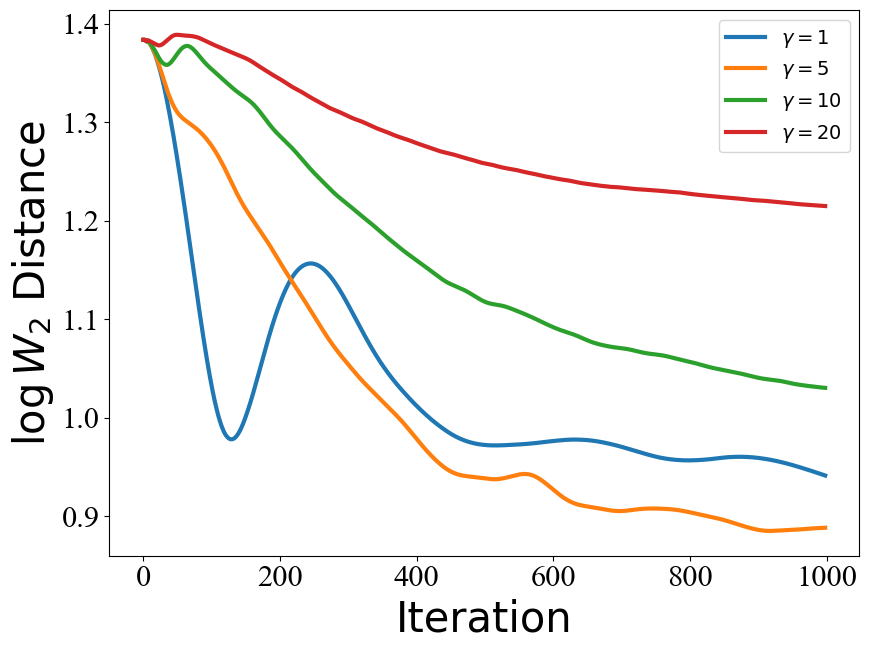

In [12]:
gamma_vals = [1, 5, 10, 20]
w2variation_for_gamma_o3 = {}
for gamma in gamma_vals:
    o3p = hc.O3Params(eta=o3best_eta, gamma=gamma, xi=o3best_xi)
    sam = hc.HoLMCSamplerO3Regression(
        params=o3p, N=N, seed=seed, show_progress=False
    )
    samm = sam.sample(X=X, y=y, lamb=lamb)
    w2variation_for_gamma_o3[gamma] = metric.w2distance(samm, log_scale=True)
w2variation_for_gamma_o3df = pd.DataFrame(w2variation_for_gamma_o3)
# Plotting
figure, ax = plt.subplots(figsize=(8.8, 6.6))
for col, gamma in zip(w2variation_for_gamma_o3df, gamma_vals):
    plt.plot(
        w2variation_for_gamma_o3df.index,
        w2variation_for_gamma_o3df[col],
        label=f"$\\gamma = {gamma}$",
        linewidth=3
    )
plt.xlabel("Iteration", fontsize=30)
plt.ylabel("$\\log{W_2}$ Distance", fontsize=30)
plt.legend(fontsize=14, loc="upper right")
ax.tick_params(axis='both', which='major', labelsize=22) 
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Times New Roman')
plt.tight_layout()
plt.savefig('../images/o3gamma_variation.png')
plt.show()

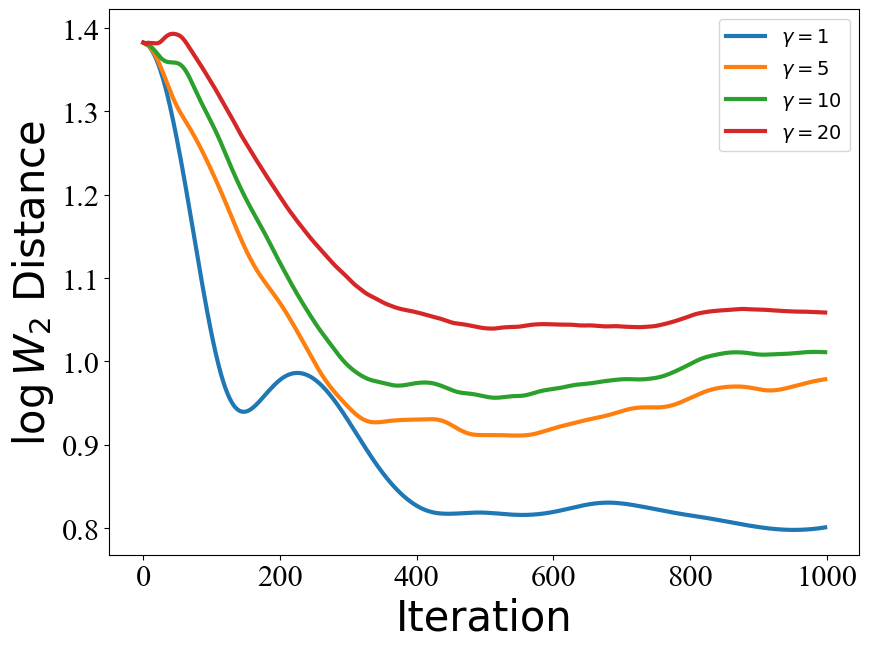

In [13]:
gamma_vals = [1, 5, 10, 20]
w2variation_for_gamma_o4 = {}
for gamma in gamma_vals:
    o4p = hc.O4Params(eta=o4best_eta, gamma=gamma)
    sam = hc.HoLMCSamplerO4Regression(
        params=o4p, N=N, seed=seed, show_progress=False
    )
    samm = sam.sample(X=X, y=y, lamb=lamb)
    w2variation_for_gamma_o4[gamma] = metric.w2distance(samm, log_scale=True)
w2variation_for_gamma_o4df = pd.DataFrame(w2variation_for_gamma_o4)
# Plotting
figure, ax = plt.subplots(figsize=(8.8, 6.6))
for col, gamma in zip(w2variation_for_gamma_o4df, gamma_vals):
    plt.plot(
        w2variation_for_gamma_o4df.index,
        w2variation_for_gamma_o4df[col],
        label=f"$\\gamma = {gamma}$",
        linewidth=3
    )
plt.xlabel("Iteration", fontsize=30)
plt.ylabel("$\\log{W_2}$ Distance", fontsize=30)
plt.legend(fontsize=14, loc="upper right")
ax.tick_params(axis='both', which='major', labelsize=22) 
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Times New Roman')
plt.tight_layout()
plt.savefig('../images/o4gamma_variation.png')
plt.show()